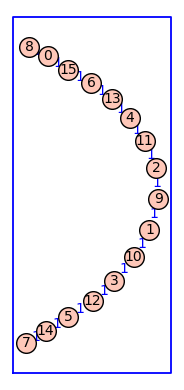

Multiplicity list: [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]


In [19]:
from sage.graphs.distances_all_pairs import floyd_warshall
from sage.graphs.distances_all_pairs import diameter

def allRarySequences(length, alphSize):  #Finds all r-ary sequences of length numEdges.  Used for weight assignments.
    DBSeq = DeBruijnSequences(alphSize,length).an_element()
    rArySequences = []
    for i in range(0,len(DBSeq)-length+1):
        currentSeq = []
        for j in range(0,length):
            currentSeq.append(DBSeq[i+j]+1)
        rArySequences.append(currentSeq)
    return rArySequences

def calculateMultiplicityList(dist):
    Mult = []
    for i in range(1,n):
        ithMult = 0
        for j in range(0,n):
            for k in range(j+1,n):
                if dist[j][k] == i:
                    ithMult = ithMult + 1
        Mult.append(ithMult)
    return Mult

def checkCCCondition(Mult):
    isCC = true
    for i in range(1,n):
        if i not in Mult:
            isCC = false
    return isCC

def checkUniformMultiplicityCondition(Mult):
    n = len(Mult)+1
    isUniform = true
    for i in Mult:
        if i != floor(n/2):
            isUniform = false
    return isUniform
    

n = 16  #number of vertices (Remember to also change numVertices in the "nauty_geng" argument)
e = 15  #number of edges (Remember to also change numEdges in the "nauty_geng" argument)
r = 1  #weights are chosen in {1,2,...,r}.  Note r must be at least 2 for the DeBruijn method above to work.
Graphs = graphs.nauty_geng("16 15:15 -c") #Generates all connected graphs on specified numVertices and numEdges ***Must input actual value of vertices and edges in argument: ("numVertices numEdges:numEdges -c").  "-c" restricts to connected graphs.
rArySequences = allRarySequences(e,r) #Makes all r-ary sequences (+1 to each entry) using DeBruijn sequence method above.
if r == 1:
    allOnes = [1 for i in range(e)]
    rArySequences.append(allOnes)
for G in Graphs:
    sizeOfAutomorphismGroup = G.automorphism_group().cardinality() #Size of symmetry group of G
    if sizeOfAutomorphismGroup >= 1:
        numberOfWorkingWeightAssignments = 0 #Counts number of weight assignments that make G a CCG
        for weightAssignment in rArySequences:
            if numberOfWorkingWeightAssignments >0:
                break
            #I couldn't find a good weighted graph distance package, so I just subdivided edges in G a number of times equal to the edge weight.  I think this approach is not too inefficient.
            #Edge weight assignment
            H = G.copy()
            edgeCounter = 0
            for u in range(0,n):
                for v in range(u+1,n):
                    if G.has_edge(u,v):
                        #print(edgeCounter)
                        if r>1:
                            H.subdivide_edge((u,v),weightAssignment[edgeCounter]-1)
                        G.set_edge_label(u,v,weightAssignment[edgeCounter])
                        edgeCounter = edgeCounter+1
            if sage.graphs.distances_all_pairs.diameter(H, algorithm='2sweep', source=None) <= n-1:
                #Calculating distances
                dist = floyd_warshall(H, paths=false, distances=true)
                #Calculating Multiplicity List
                Mult = calculateMultiplicityList(dist)

                #Option 1: Checking whether distances satisfy CC condition
                #If weight assignment works on G, then print relevant info and show weighted graph.
                if checkCCCondition(Mult) == true:
                    G.show(vertex_labels=True, edge_labels=True, graph_border=True, figsize=[4,4])
                    print("Multiplicity list:", Mult)
                    numberOfWorkingWeightAssignments = numberOfWorkingWeightAssignments+1

                #Option 2: Checks for Uniform Multiplicity Property
                #if checkUniformMultiplicityCondition(Mult) == true:
                    #G.show(vertex_labels=True, edge_labels=True, graph_border=True, figsize=[4,4])
                    #print("Multiplicity list:", Mult)
                    #numberOfWorkingWeightAssignments = numberOfWorkingWeightAssignments+1

        #If no weight assignment works, then just print the graph without edge weights.
        #if numberOfWorkingWeightAssignments == 0:
            #G.show(vertex_labels=True, edge_labels=False, graph_border=True, figsize=[4,4])
        #print("( Number of Weight Assignments, Size of Automorphism Group ) = (",numberOfWorkingWeightAssignments, sizeOfAutomorphismGroup,")")